<a href="https://colab.research.google.com/github/ecemozturkk/TensorFlow-Colab-Notes/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Regression with TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

### **What we're going to cover**

Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

### **Typical architecture of a regresison neural network**


Hyperparameter  | Typical value 
-------------------|------------------
Input layer shape     | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)
Hidden layer(s)      | Problem specific, minimum = 1, maximum = unlimited
RNeurons per hidden layer       | Problem specific, generally 10 to 100
Output layer shape      | Same shape as desired prediction shape (e.g. 1 for house price)
Hidden activation       | Usually ReLU (rectified linear unit)
Output activation      | None, ReLU, logistic/tanh
Loss function      | MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers
Optimizer      | SGD (stochastic gradient descent), Adam

#**40 - Creating sample regression data (so we can model it)**

## *Introduction to Regression with Neural Networks in TensorFlow*

### There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


### Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

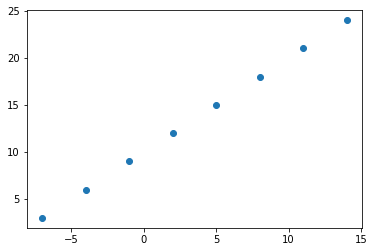

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Before we do any modelling, can you calculate the pattern between X and y?

For example, based on this data what the y value would be if X was 17.0?

Or how about if X was -10.0?

This kind of pattern discover is the essence of what we'll be building neural networks to do for us.

### Input and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

# **41 - The major steps in modelling with TensorFlow**

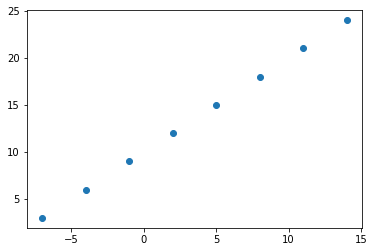

In [ ]:
# Turn our NumPy arrays into tensors

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use X to predict y.

So our **input** will be X and our **output** will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape , output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:

# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modeillng with TensorFlow


1.   **Creating a model -** define the input and output layers, as well as hidden layers of a deep learning model.
2.   **Compiling a model -** define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3.   **Fitting a model -** letting the model try to find patterns between X&y (features and labels)

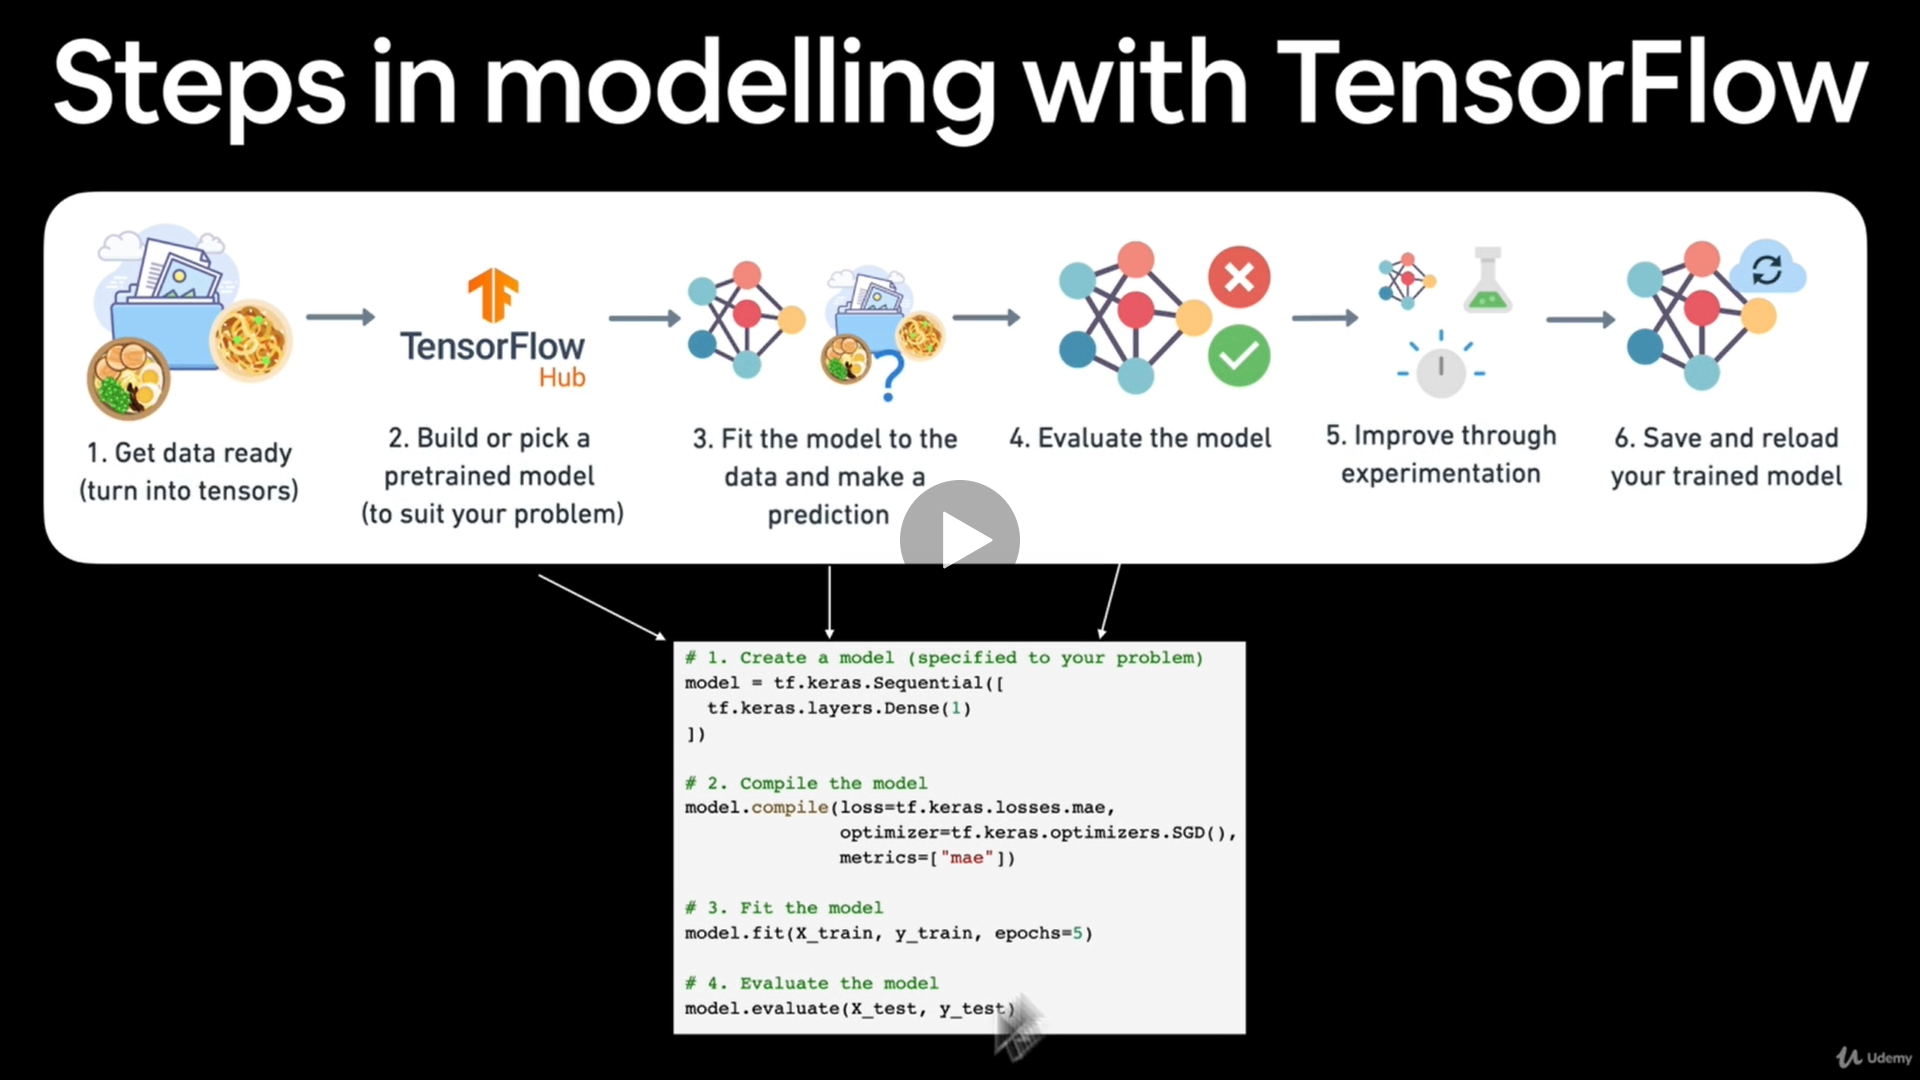



In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for 'mean absolute error'
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent
              metrics=["mae"]
              )
# 3. Fit the model
model.fit(X,y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


We've just trained a model to figure out the patterns between X and y.

In [80]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [81]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11 
# mae yani ortalama hata degeri 11 civarinda oldugu icin 11 ekledik, dogru sonuca yaklasmak icin

array([[23.71602]], dtype=float32)

# **42 - Steps in improving a model with TensorFlow PART 1**

## We can improve our model, by altering the steps we took to create a model.



1.   **Creating a model -** Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation of each layer.
2.   **Compiling a model -** Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.   **Fitting a model - ** Here we might fit a model for more **epochs**(leave it training for longer) or on more data(give the model more examples to learn from).



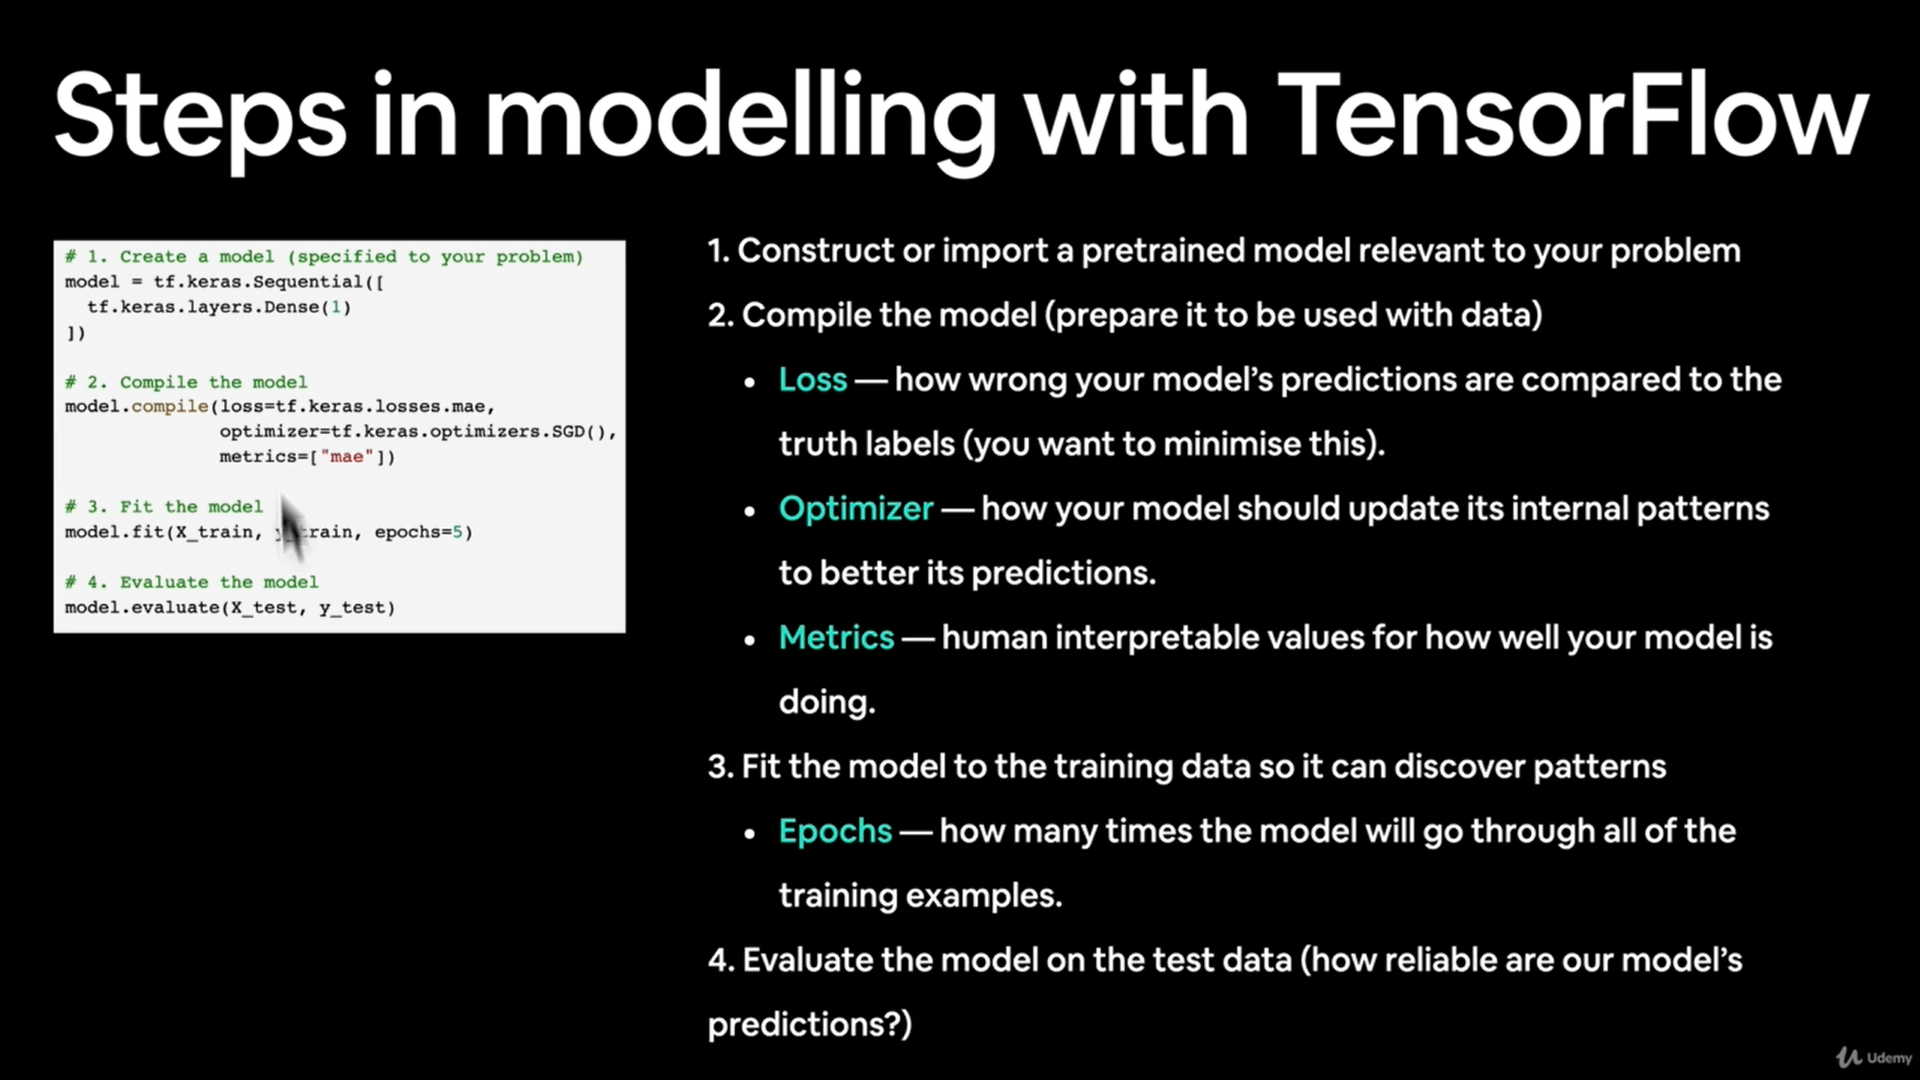

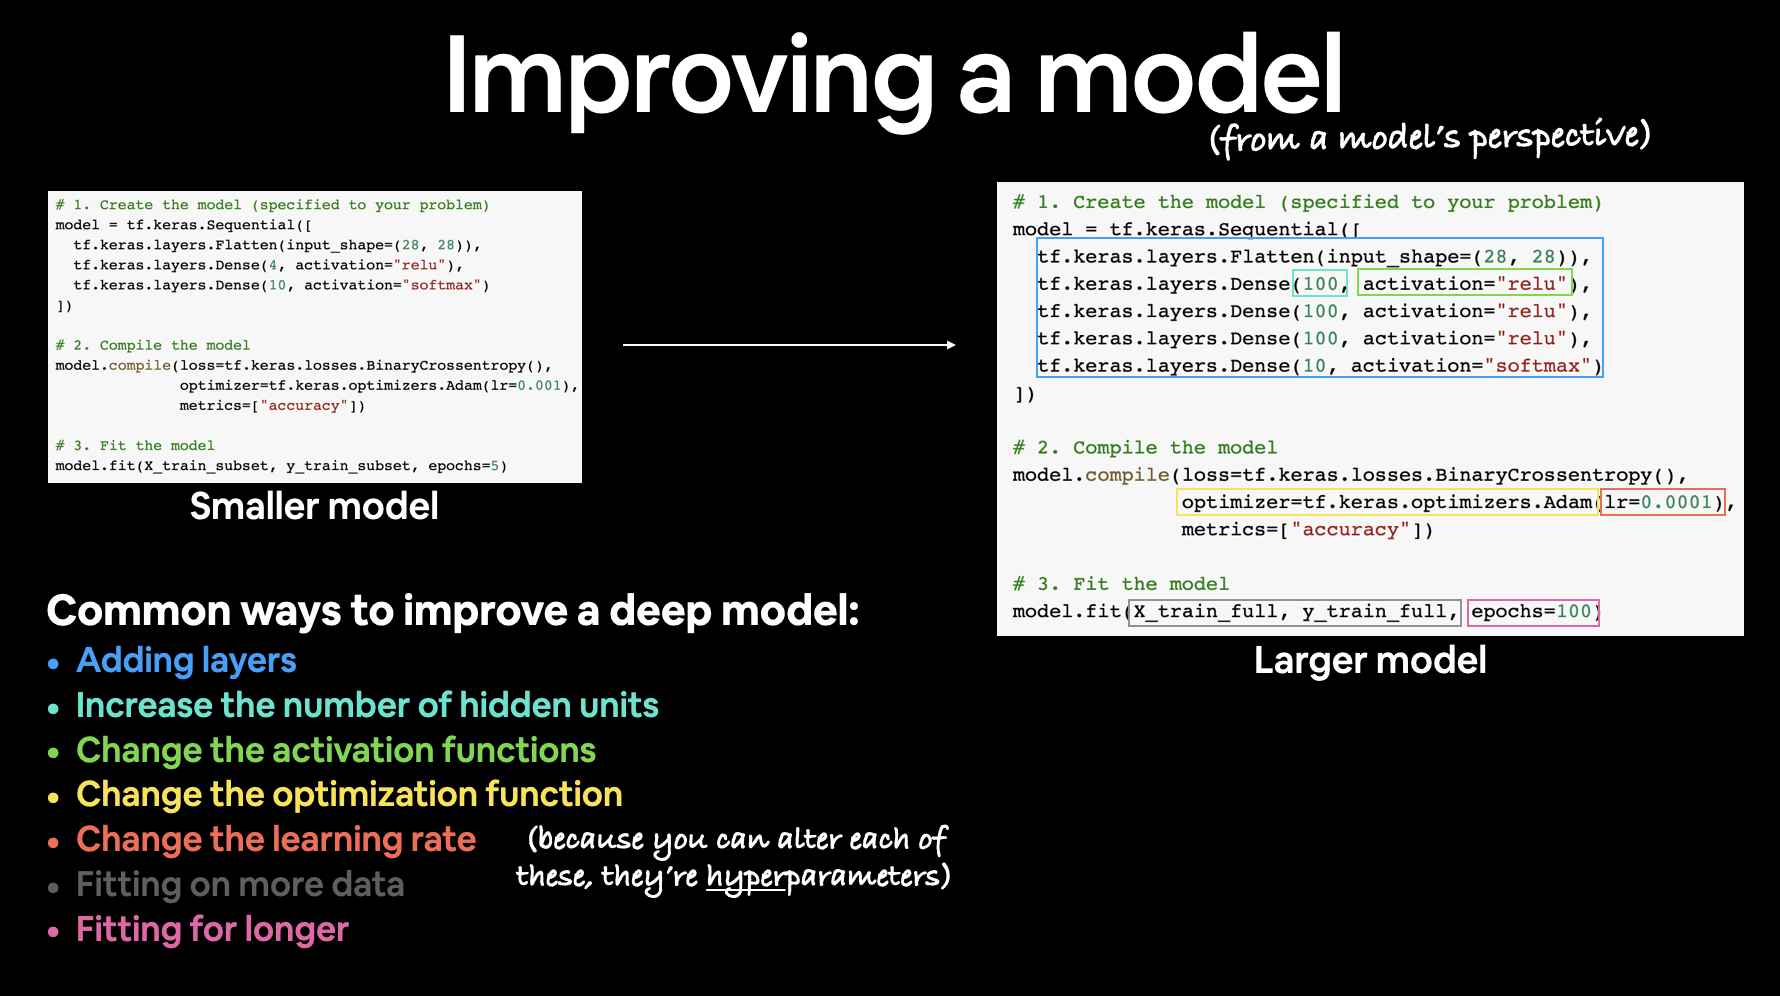

# **43 - Steps in improving a model with TensorFlow PART II**

In [82]:
 # Let's rebuild our model
 
 # 1. Create the model (same as above)
 model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
 ])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X,y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 243ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [ ]:
# Remind ourselves of the data 
X ,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [83]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[29.739855]], dtype=float32)

# **44 - Steps in improving a model with TensorFlow PART III**

In [ ]:
# Let's see if we can make another to improve our model 

# 1. Create the model (this time with an extra hidden layer with 100 hidden layers)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,   #Bu satirde loss="mae", de yazsan ayni sey
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])
# 3. Fit the model
model.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 386ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 4.7689 - mae: 4.7689
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2660 - mae: 9.2660
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8540 - mae: 8.8540
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 5.4012 - mae: 5.4012
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 3.5077 - mae: 3.5077
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3094 - mae: 5.3094
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 4.5809 - mae: 4.5809
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 2.9811 - mae: 2.9811
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7295 - mae: 3.7295
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 3.4

In [ ]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.032574]], dtype=float32)

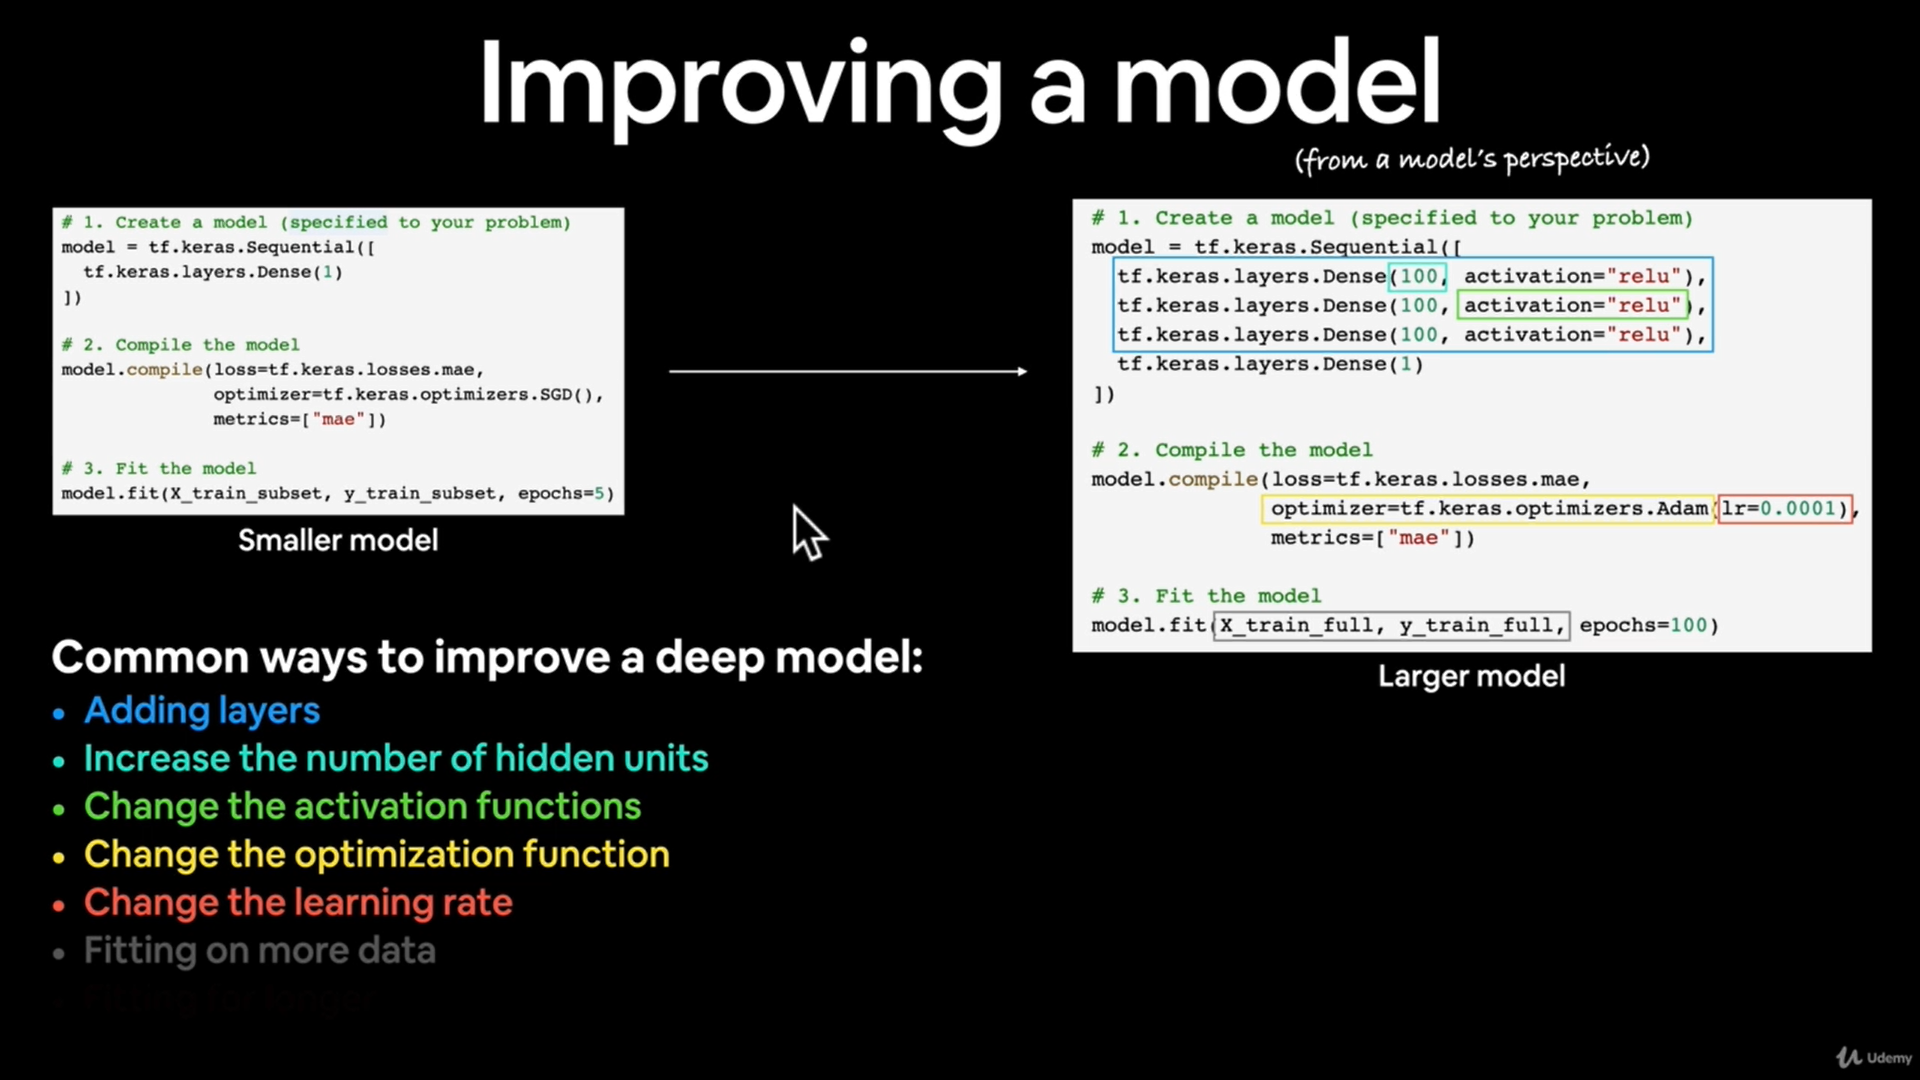

# **45 - Evaluating a TensorFlow model Part I**

## In practise, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.....
```
## When it comes to evaluation.. there are 3 words you should memorize :
> "Visualize, visualize, visualize"

## It's a good idea to visualize:
* **The data** - what data are we working with? What does it look like?
* **The model itself** - what does our model look like?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of the model** - how do predictions of a model line up against the ground truth( the original labels)

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).



In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)   #-100'den 100'e 4'er 4'er
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X+ 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

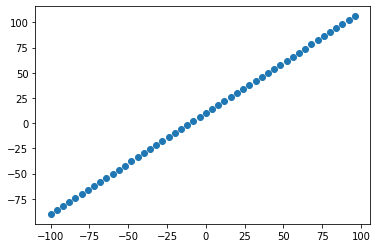

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)


# **46 - Evaluating a TensorFlow model PART II (the three datasets)**
## The 3 sets
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available 
* **Validation set**- the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available 

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets 
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train= y[:40]


X_test= X[40:]   # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets.. let's visualize it again!

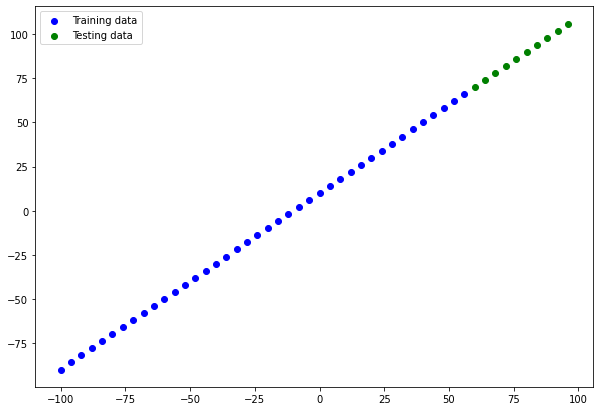

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# Plot testing data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();


With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

# **47 - Evaluating a TensorFlow model PART III (getting a model summary)**
### Let's have a look at hw to build a neural network for our data

In [ ]:
# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1,input_shape=[1])
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,   #Bu satirde loss="mae", de yazsan ayni sey
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit the model
# model.fit(X_train,y_train,epochs=100)

## Visualizing the model

In [85]:
model.summary()

# Calling summary() on our model shows us the layers it contains,
# the output shape and the number of parameters.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### **Total params** - total number of parameters in the model.
### **Trainable parameters** - these are the parameters (patterens) the model can update as it trains
### **Non-trainable params** - there parameters are'nt updated during training (this is typical when you bring in already learned patterns or parameters from other models during *transfer learning*)

# **48 - Evaluating a TensorFlow model PART IV (visualising a model's layers)**

In [ ]:
#Let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# get a summary of our model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),  #1 yerine 10 yazarak olacak degisikleri gozlemledik
                             tf.keras.layers.Dense(1,name="output_layer")
], name="modelllll" )

model.compile(loss=tf.keras.losses.mae,   
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0) 


In [ ]:
model.summary()

Model: "modelllll"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


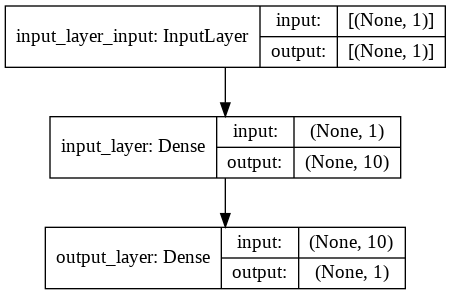

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

# **49 - Evaluating a TensorFlow a model PART V (visualising a model's predictions)**

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this int the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [90]:
 # Make some predictions
 y_preds = model.predict(X_test)
 # View the predictions
 y_preds

array([[102.877426],
       [109.68092 ],
       [116.48442 ],
       [123.28792 ],
       [130.09142 ],
       [136.89491 ],
       [143.6984  ],
       [150.50189 ],
       [157.30539 ],
       [164.10889 ]], dtype=float32)

In [91]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [92]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):

#Plots training data, test data and compares predictions to ground truth labels

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();





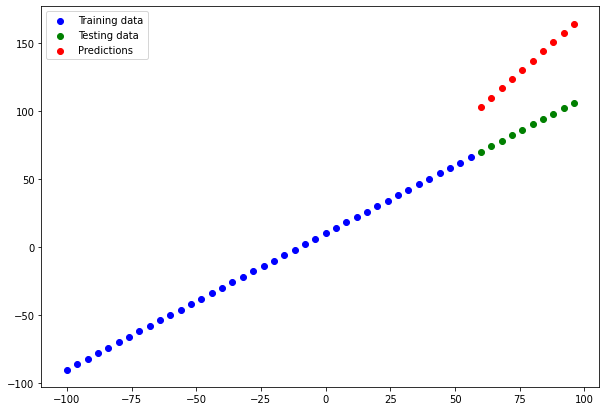

In [93]:
plot_predictions()  #ya da tam gostermek icin plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)  seklinde de yazilabilirdi

# **50 - Evaluating a TensorFlow a model PART VI (common regression evaluation metrics)**

 Depending on the program you're working on, there will be different evaluation metrics to evaluate your model's performance.

 Since we're working on a regression, two of the main metrics:


*   MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
*   MSE - meqan square error, "square the average errors"

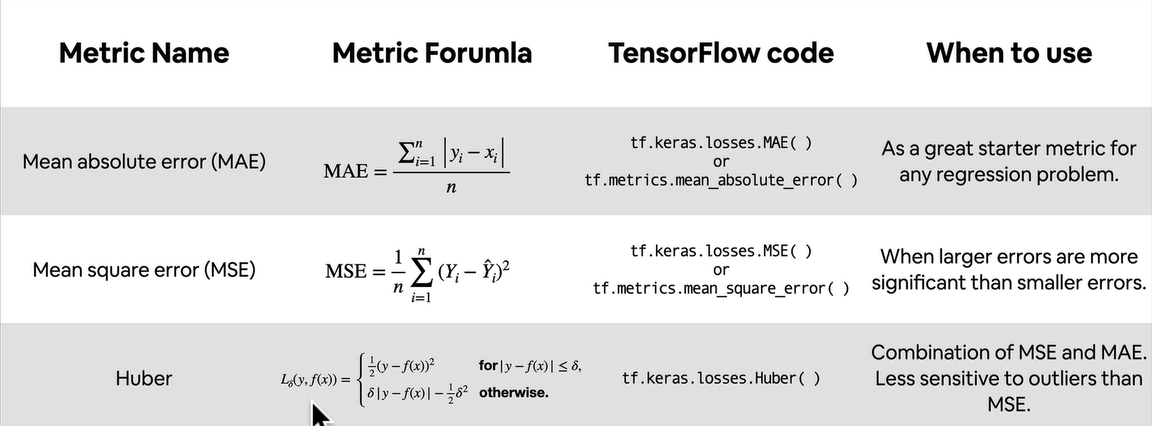

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 17.5064 - mae: 17.5064


[17.506357192993164, 17.506357192993164]

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [ ]:
y_pred

array([[ 81.55673 ],
       [ 86.87887 ],
       [ 92.20101 ],
       [ 97.523155],
       [102.84529 ],
       [108.16743 ],
       [113.489555],
       [118.81169 ],
       [124.133835],
       [129.45598 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

# **51 - Evaluating a TensorFlow a model PART VII (mean absolute error)**

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.977307, 10.      , 10.440203, 12.209262, 15.476233, 20.167427,
       25.489555, 30.811691, 36.133835, 41.45598 ], dtype=float32)>

That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [94]:

# Check the test label tensor values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [95]:

# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[102.877426],
       [109.68092 ],
       [116.48442 ],
       [123.28792 ],
       [130.09142 ],
       [136.89491 ],
       [143.6984  ],
       [150.50189 ],
       [157.30539 ],
       [164.10889 ]], dtype=float32)

In [96]:
# Check the tensor shapes
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [97]:

# Shape before squeeze()
y_preds.shape

(10, 1)

In [98]:

# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [99]:
# What do they look like?
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([102.877426, 109.68092 , 116.48442 , 123.28792 , 130.09142 ,
        136.89491 , 143.6984  , 150.50189 , 157.30539 , 164.10889 ],
       dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [100]:
#Calculate the mean absolute error (MAE)
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=45.493156>

# **52 - Evaluating a TensorFlow regression model part VII (mean square error)**

In [ ]:
# Calculate the mean square error (MSE)
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse 

<tf.Tensor: shape=(), dtype=float32, numpy=320.89386>

Let's make functions for our evaluation metrics.

In [ ]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

# **53 - Setting up TensorFlow modelling experiments PART I (start with a simple model)**

## Running experiments to improve our model

1. **Get more data** -get more examples for your model to trasin on (more opportunities to learn patterns or relationships between features and labels)
2. **Make your model larger (using a more complex model)** - this might come in the form of more layers or more hidden units in each layer
3. **Train for longer**- give your model more of a chance to find patterns in data.

## Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs 
3. `model_3` - 2 layers, trained for 500 epochs

## **Build `model_1`**

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

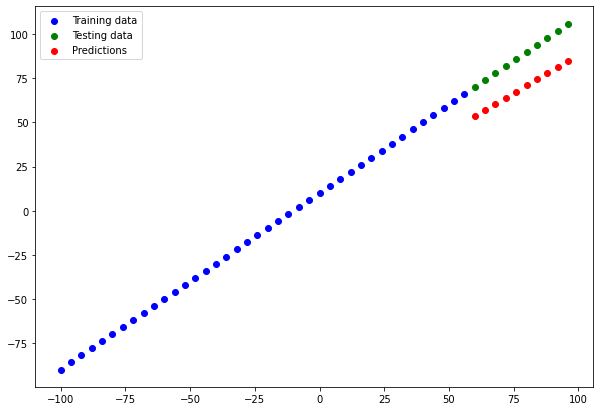

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [ ]:
## Squeeze'in ne ise yaradigi hakkinda kisa bir hatirlatma
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1)).numpy()
mse_1 = mse(y_test, tf.squeeze(y_preds_1)).numpy()
mae_1, mse_1 

(18.745327, 18.745327)

# **54 - Setting up TensorFlow modelling experiments PART II (increasing complexity)**

## **Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

*   2 dense layers trained for 100 epochs



In [101]:
# set the random seed
tf.random.set_seed(42)

#1. create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)   #output layer
])
#2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
#3. fit the model
model_2.fit(X_train, y_train, epochs=100)   # set verbose to 0 for less output


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

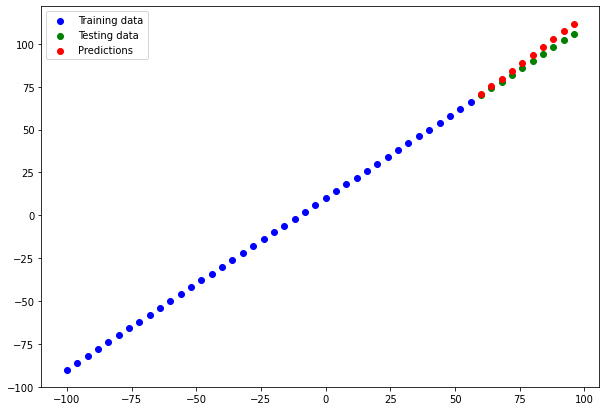

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.1969407, 3.1969407)

## **Build `model_3`**

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

*   2 layers, trained for 500 epochs


In [102]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  (Replicate model_2)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms

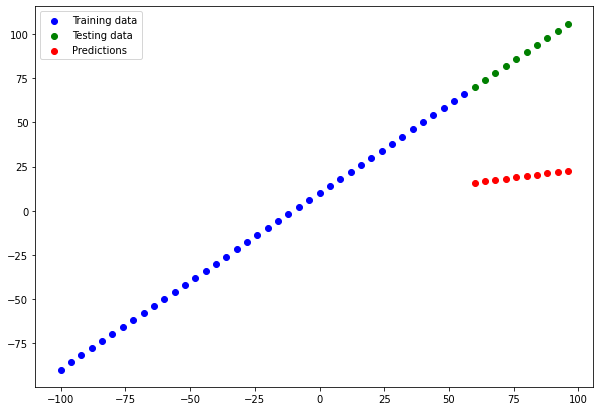

In [103]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.713615, 68.713615)

### **Note** : You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.*italik metin*



# **55 - Comparing and tracking your TensorFlow modelling experiments**

## We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,18.745327
1,model_2,3.196941,3.196941
2,model_3,68.713615,68.713615


Looks like `model_2` performed the best..

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note** : One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you'll get closer to figuring out what work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine larning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource** : As you build more models, you'll want to look into using:


*   TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
*   Weights & Biases - a tool for tracking all of kinds of machine larning experiments (plugs straight into TensorBorad.)



# **56 - How to save a TensorFlow model**

Saving our models allows us to use them outside of Colab (or wherever they were trained) such as in a web application or a mobile app.

There are 2 main formats we can save our model's too:


1.  The SavedModel format
2.  The HDF5 format



In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")


# **57 - How to load and use a saved TensorFlow model**

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# **58 - (Optional) How to save and download files from Colab**

If you want to download your files from Colab:


1.   You can go to the "files" tab and right click on the file you're after and click "download".
2.   Use code (see the code below)
3.   Save it to Google Drive by connecting Google Drive and copying it there. (see 2nd code cell below)



In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")   # copy path

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

# **59 - Putting together what we've learned PART I (preparing a dataset)**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance ["sex"]

In [ ]:
insurance ["smoker"], insurance["age"]

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
pd.get_dummies(insurance)

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

# **60 - Putting together what we've learned PART II (building a regression model)**

In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

In [ ]:
# View y
y.head()

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

In [ ]:
02.*1338

In [ ]:
model_2.summary()

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

#2.compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#3. fit the model
insurance_model.fit(X_train, y_train, epochs=100)


In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

Right now it looks like our model isn't performing very well.. let's try and improve it

# **61 - Putting together what we've learned PART II (improving our regression model)**

To (try) improve our model, we'll run 2 experiments:

1.   Add an extra layer with more hidden units *and use the Adam optimizer*
2.   Train for longer *(200 epochs)*



In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

#3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
# evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

In [ ]:
# Evaulate our third model
insurance_model_3.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
# plot hs=istory (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Question : How long should you train for?
It depends. It depends on the problem you're working on. However, many people have asked this quesiton before.. so TensorFlow has a solution! It's called the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

# **62 - Preprocessing data with feature scaling PART I (what is feature scaling?)**

## Normalization and standardization

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better. 

In [ ]:
X

In [ ]:
X["age"].plot()

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

# **63 - Preprocessing data with feature scaling PART II (normalising our data)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  #turn all values in these columns between 0 and 1 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# what does our data look like now?
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

# **64 - Preprocessing data with feature scaling PART III (fitting a model on scaled data)**

In [ ]:
# Build a neural network model to fit on our normalized data

# set the random seed
tf.random.set_seed(42)

#1. create the model 
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)


In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477